<a href="https://colab.research.google.com/github/wooihaw/practical_ai/blob/main/handson_4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

11501568/11490434 [==============================] - 0s 0us/step


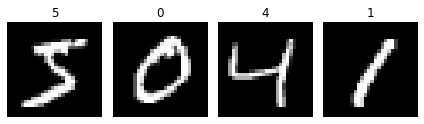

In [2]:
# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
sp1 = plt.subplot(141)
sp1.axis(False)
sp1.set_title(y_train[0])
sp1.imshow(X_train[0], cmap=plt.get_cmap('gray'))
sp2 = plt.subplot(142)
sp2.axis(False)
sp2.set_title(y_train[1])
sp2.imshow(X_train[1], cmap=plt.get_cmap('gray'))
sp3 = plt.subplot(143)
sp3.axis(False)
sp3.set_title(y_train[2])
sp3.imshow(X_train[2], cmap=plt.get_cmap('gray'))
sp4 = plt.subplot(144)
sp4.axis(False)
sp4.set_title(y_train[3])
sp4.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.tight_layout()
plt.show()

In [3]:
# Basic MLP for MNIST dataset
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define basic MLP model
# create model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))

# To do: Add another fully-connected (dense) layer here

model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# To do: Try with other optimizers (RMSprop, Adam)
opt = SGD(lr=0.01)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Error: {100-scores[1]*100:.2f}")

Epoch 1/20
300/300 - 3s - loss: 1.2216 - accuracy: 0.7238 - val_loss: 0.7033 - val_accuracy: 0.8505 - 3s/epoch - 11ms/step
Epoch 2/20
300/300 - 1s - loss: 0.6024 - accuracy: 0.8599 - val_loss: 0.4937 - val_accuracy: 0.8814 - 1s/epoch - 4ms/step
Epoch 3/20
300/300 - 1s - loss: 0.4730 - accuracy: 0.8809 - val_loss: 0.4165 - val_accuracy: 0.8946 - 1s/epoch - 4ms/step
Epoch 4/20
300/300 - 1s - loss: 0.4145 - accuracy: 0.8916 - val_loss: 0.3743 - val_accuracy: 0.9028 - 1s/epoch - 4ms/step
Epoch 5/20
300/300 - 1s - loss: 0.3795 - accuracy: 0.8988 - val_loss: 0.3484 - val_accuracy: 0.9072 - 1s/epoch - 4ms/step
Epoch 6/20
300/300 - 1s - loss: 0.3554 - accuracy: 0.9039 - val_loss: 0.3289 - val_accuracy: 0.9113 - 1s/epoch - 4ms/step
Epoch 7/20
300/300 - 1s - loss: 0.3372 - accuracy: 0.9077 - val_loss: 0.3136 - val_accuracy: 0.9131 - 1s/epoch - 4ms/step
Epoch 8/20
300/300 - 1s - loss: 0.3227 - accuracy: 0.9109 - val_loss: 0.3014 - val_accuracy: 0.9166 - 1s/epoch - 4ms/step
Epoch 9/20
300/300 - 1s

[[7.8067296e-06 2.2115016e-06 7.6763543e-05 1.8795505e-05 9.6666360e-01
  1.0463404e-04 3.3465237e-04 3.1064907e-03 1.8090145e-03 2.7876016e-02]]
Predicted label: 4


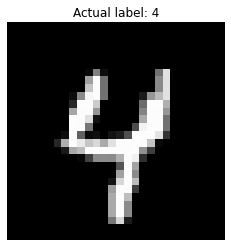

In [4]:
# Make predition (change index to a number between 0 and 9999)
index = 1111
res = model.predict(X_test[index].reshape(1, 784))
print(res)
print(f'Predicted label: {np.argmax(res)}')

# Display the test image and show the actual label
plt.axis(False)
plt.title(f'Actual label: {y_test[index].argmax()}')
plt.imshow(X_test[index].reshape(28, 28) * 255, cmap='gray')
plt.show()

In [5]:
# To do: Plot the accuracy and loss for both training and validation data
import matplotlib.pyplot as plt
